# Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

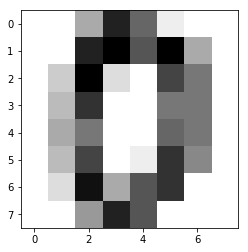

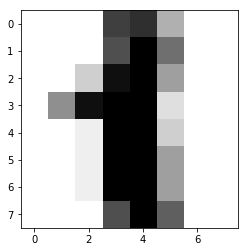

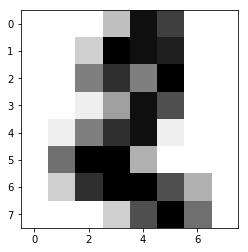

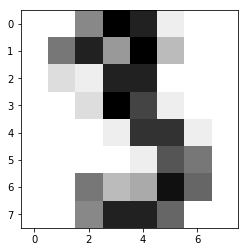

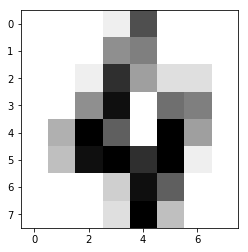

In [3]:
for i in range(5):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(Normalizer().fit_transform(digits.data), digits.target)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/Users/lev/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.87333333333333329

In [17]:
mlp_adam = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='adam', tol=1e-4, random_state=1)

mlp_adam.fit(X_train, y_train)
mlp_adam.score(X_test, y_test)

0.98888888888888893

In [19]:
for alpha in [0.0001, 0.01, 0.05, 0.1, 0.5]:
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=alpha,
                    solver='adam', tol=1e-4, random_state=1)

    mlp.fit(X_train, y_train)
    print(mlp.score(X_test, y_test))

0.988888888889
0.984444444444
0.984444444444
0.977777777778
0.971111111111
